In [1]:
# CNN 
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input, InputLayer,GlobalAveragePooling2D


In [2]:
import tensorflow as tf

In [3]:
def load_audio_files(directory):
    audio_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            y, sr = librosa.load(file_path, sr=8000)
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, hop_length=200)
            S_dB = librosa.power_to_db(S, ref=np.max)
            audio_data.append(S_dB)
    return audio_data

def prepare_data(audio_data):
    max_length = max([s.shape[1] for s in audio_data])
    padded_data = []
    for S in audio_data:
        if S.shape[1] < max_length:
            S = np.pad(S, ((0, 0), (0, max_length - S.shape[1])), mode='constant')
        padded_data.append(S)
    return np.array(padded_data)

directory = 'birds-for_classes'  # Укажите путь к вашим звуковым файлам
audio_data = load_audio_files(directory)
prepared_data = prepare_data(audio_data)
prepared_data = prepared_data[..., np.newaxis]  # Добавляем размерность для каналов

In [4]:
from tensorflow.keras.layers import InputLayer, GlobalAveragePooling2D
# Определение модели CNN
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(InputLayer(shape=input_shape))  # Явное указание входного слоя
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(GlobalAveragePooling2D())
    #model.add(Flatten())  GlobalAveragePooling2D() дан кейин флаттен кере бумиди
    model.add(Dense(128, activation='relu'))
    #model.add(Dense(input_shape[0], activation='softmax'))  # Измените это, чтобы соответствовать целевой форме
    return model

In [5]:
# Определение модели
input_shape = (prepared_data.shape[1], prepared_data.shape[2], 1)  # (height, width, channels)
model = create_cnn_model(input_shape)

In [6]:
# Извлечение признаков
features = model.predict(prepared_data)  # Получаем признаки из модели

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [7]:
# Применение K-means для кластеризации

number_of_clusters = 4  # Укажите количество кластеров
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(features)  # Обучаем K-means на извлеченных признаках
labels = kmeans.labels_  # Получаем метки кластеров для каждого аудиофайла

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


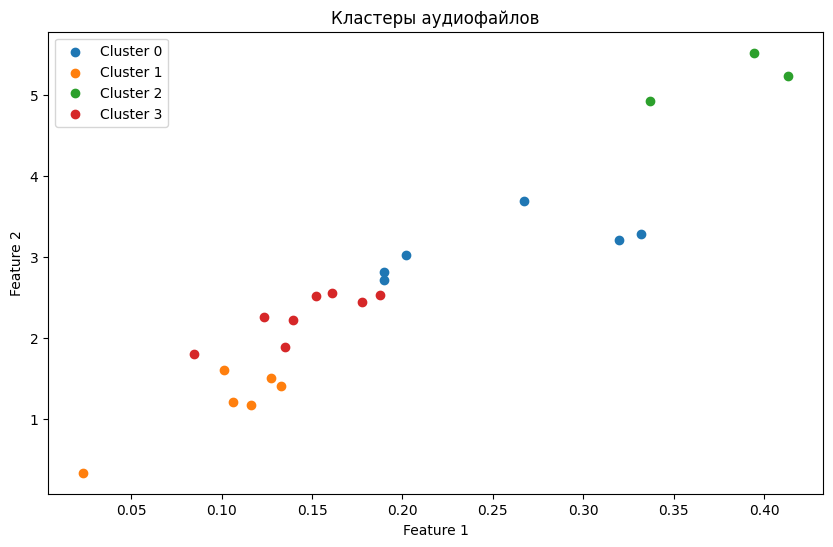

In [8]:
# Визуализируем кластеры
plt.figure(figsize=(10, 6))
for i in range(number_of_clusters):
    plt.scatter(features[labels == i, 0], features[labels == i, 1], label=f'Cluster {i}')
plt.title('Кластеры аудиофайлов')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [18]:
all_files = os.listdir(directory)

In [22]:
# Создаем DataFrame
import pandas as pd
data = {
    'Audio File': [os.path.basename(file) for file in all_files],  # Извлекаем только имена файлов
    'Cluster': labels  # Номера кластеров
}

df = pd.DataFrame(data)

# Выводим DataFrame
print(df)

   Audio File  Cluster
0       1.wav        3
1     10​.wav        1
2     11​.wav        1
3     12​.wav        1
4     13​.wav        0
5     14​.wav        0
6      15.wav        1
7      17.wav        0
8      18.wav        3
9      19.wav        2
10      2.wav        3
11     20.wav        2
12     21.wav        0
13     22.wav        3
14     23.wav        0
15     24.wav        3
16      3.wav        3
17      4.wav        1
18      5.wav        2
19      6.wav        0
20     7​.wav        3
21      8.wav        3
22     9​.wav        1
